In [1]:
import numpy as np

In [2]:
from itertools import combinations
import networkx as nx

def generate_possible_pairs(p, e, b):
    polish_only = list(range(p))
    print(f"polish {polish_only}")
    english_only = list(range(p, p + e))
    print(f"english {english_only}")
    bilingual = list(range(p + e, p + e + b))
    print(f"bilingual {bilingual}")

    possible_pairs = []

    # Polish-only pairs
    possible_pairs.extend(combinations(polish_only, 2))
    # English-only pairs
    possible_pairs.extend(combinations(english_only, 2))
    # Polish and bilingual
    possible_pairs.extend([(po, bi) for po in polish_only for bi in bilingual])
    # English and bilingual
    possible_pairs.extend([(eo, bi) for eo in english_only for bi in bilingual])
    # Bilingual pairs
    possible_pairs.extend(combinations(bilingual, 2))

    return possible_pairs

def max_rounds(p, e, b):
    possible_pairs = generate_possible_pairs(p, e, b)

    G = nx.Graph()
    G.add_edges_from(possible_pairs)

    rounds = 0
    total_people = p + e + b
    if total_people % 2 != 0:
        return 0  # If odd number of people, cannot pair everyone in each round

    all_rounds = []
    
    while len(G.edges) > 0:
        matching = nx.max_weight_matching(G, maxcardinality=True)
        if len(matching) * 2 != total_people:
            break  # If we can't pair everyone, stop the rounds

        # Convert set of pairs to a sorted list of tuples for consistent output
        round_pairs = sorted(list(matching))
        all_rounds.append(round_pairs)
        print(f"Round {rounds + 1}: {round_pairs}")

        # Remove the matched pairs from the graph
        G.remove_edges_from(matching)
        
        rounds += 1

    return rounds, all_rounds

# Example usage:
p = 10  # number of polish-only speakers
e = 10  # number of english-only speakers
b = 10  # number of bilingual speakers

rounds, all_rounds = max_rounds(p, e, b)


polish [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
english [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
bilingual [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Round 1: [(15, 14), (16, 13), (17, 12), (18, 11), (19, 10), (20, 9), (21, 8), (22, 7), (23, 6), (24, 5), (25, 4), (26, 3), (27, 2), (28, 1), (29, 0)]
Round 2: [(1, 9), (16, 12), (17, 13), (18, 10), (19, 11), (20, 8), (21, 14), (22, 6), (23, 7), (24, 4), (25, 5), (26, 2), (27, 3), (28, 0), (29, 15)]
Round 3: [(2, 9), (16, 14), (17, 11), (18, 13), (19, 12), (20, 10), (21, 7), (22, 8), (23, 5), (24, 6), (25, 3), (26, 4), (27, 0), (28, 15), (29, 1)]
Round 4: [(2, 8), (16, 15), (17, 10), (18, 12), (19, 13), (20, 11), (21, 9), (22, 5), (23, 4), (24, 7), (25, 6), (26, 0), (27, 1), (28, 3), (29, 14)]
Round 5: [(12, 11), (13, 10), (17, 16), (18, 15), (19, 14), (20, 7), (21, 6), (22, 9), (23, 8), (24, 3), (25, 0), (26, 1), (27, 5), (28, 4), (29, 2)]
Round 6: [(3, 7), (13, 12), (14, 17), (18, 16), (19, 15), (20, 6), (21, 11), (22, 10), (23, 9), (24, 0), (25, 1)

In [3]:
all = np.array(all_rounds)

In [4]:
#sprawdzamy czy wszystkie pary są unikalne
flat = all.reshape((16*15,2))
print(np.shape(flat))
print(np.shape(np.unique(flat, axis=0)))

(240, 2)
(240, 2)


In [5]:
possible_e_p = list(range(2,25))
possible_b = list(range(2,25))

r  = []
all_e=[]
all_b=[]


for e in possible_e_p:
    for b in possible_b:
        if (e+e+b) % 2==0:
            rounds, all_rounds = max_rounds(e, e, b)
            r.append(rounds)
            all_e.append(e)
            all_b.append(b)

polish [0, 1]
english [2, 3]
bilingual [4, 5]
Round 1: [(3, 2), (4, 1), (5, 0)]
Round 2: [(1, 0), (4, 2), (5, 3)]
polish [0, 1]
english [2, 3]
bilingual [4, 5, 6, 7]
Round 1: [(4, 3), (5, 2), (6, 1), (7, 0)]
Round 2: [(4, 2), (5, 3), (6, 0), (7, 1)]
Round 3: [(4, 1), (5, 0), (6, 3), (7, 2)]
Round 4: [(4, 0), (5, 1), (6, 2), (7, 3)]
Round 5: [(1, 0), (3, 2), (6, 5), (7, 4)]
polish [0, 1]
english [2, 3]
bilingual [4, 5, 6, 7, 8, 9]
Round 1: [(5, 4), (6, 3), (7, 2), (8, 1), (9, 0)]
Round 2: [(1, 4), (6, 2), (7, 3), (8, 0), (9, 5)]
Round 3: [(5, 3), (6, 4), (7, 0), (8, 2), (9, 1)]
Round 4: [(3, 4), (6, 0), (7, 1), (8, 5), (9, 2)]
Round 5: [(4, 0), (5, 2), (6, 1), (8, 7), (9, 3)]
Round 6: [(1, 0), (4, 2), (7, 5), (8, 3), (9, 6)]
polish [0, 1]
english [2, 3]
bilingual [4, 5, 6, 7, 8, 9, 10, 11]
Round 1: [(6, 5), (7, 4), (8, 3), (9, 2), (10, 1), (11, 0)]
Round 2: [(6, 4), (7, 5), (8, 2), (9, 3), (10, 0), (11, 1)]
Round 3: [(5, 4), (7, 6), (8, 1), (9, 0), (10, 3), (11, 2)]
Round 4: [(0, 7), (3

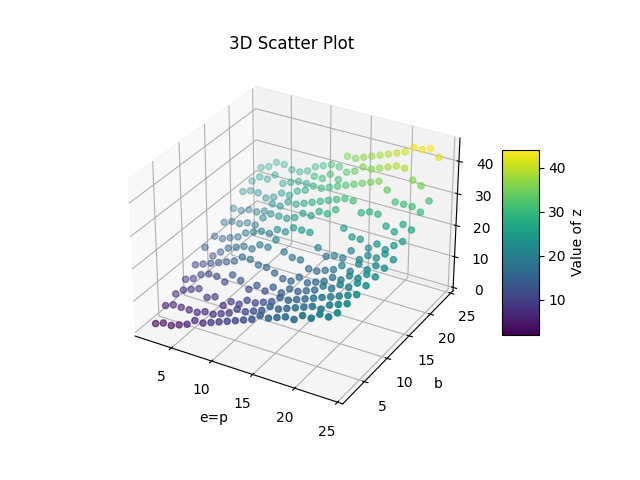

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create a figure and a 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D scatter plot
scatter = ax.scatter(all_e, all_b, r, c=r, cmap='viridis')

# Add labels
ax.set_xlabel('e=p')
ax.set_ylabel('b')
ax.set_zlabel('rounds')
ax.set_title('3D Scatter Plot')


cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Value of z')
# Show plot
plt.show()


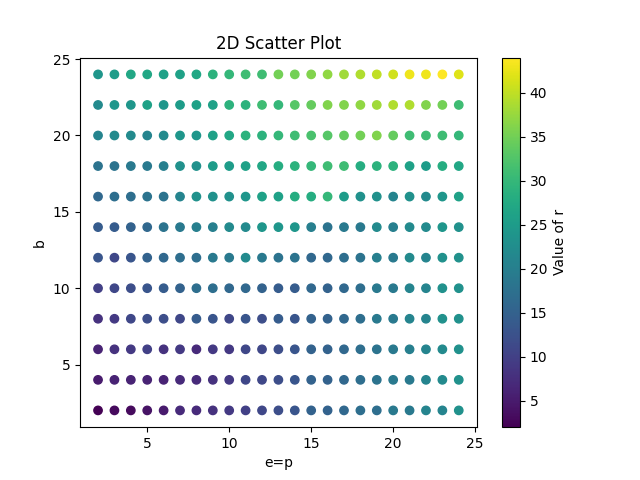

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'all_e', 'all_b', and 'r' are your data arrays

# Create a figure
fig, ax = plt.subplots()

# Plot a 2D scatter plot
scatter = ax.scatter(all_e, all_b, c=r, cmap='viridis')

# Add labels and title
ax.set_xlabel('e=p')
ax.set_ylabel('b')
ax.set_title('2D Scatter Plot')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Value of r')

# Show plot
plt.show()


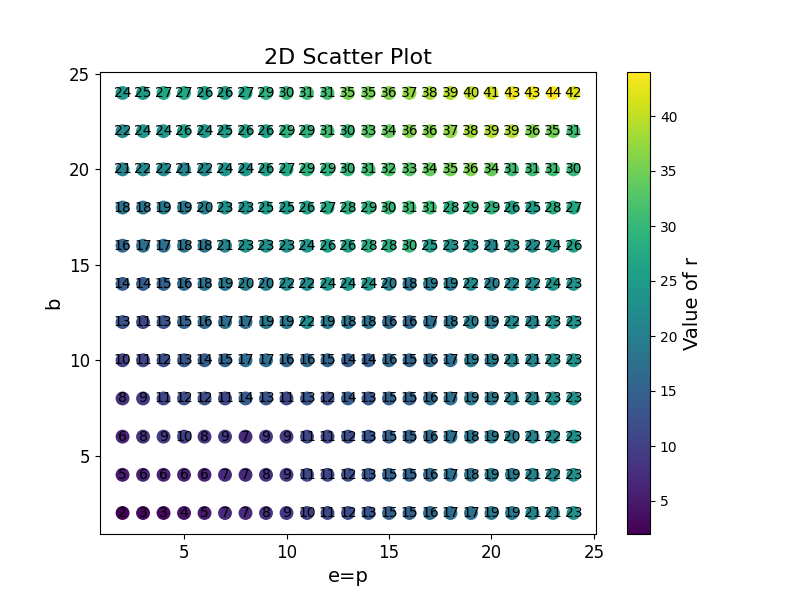

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'all_e', 'all_b', and 'r' are your data arrays

# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Plot a 2D scatter plot with larger point size and without dot borders
scatter = ax.scatter(all_e, all_b, c=r, cmap='viridis', s=100, edgecolor='none')  

# Add labels and title with larger font size
ax.set_xlabel('e=p', fontsize=14)
ax.set_ylabel('b', fontsize=14)
ax.set_title('2D Scatter Plot', fontsize=16)

# Add color bar with larger font size
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Value of r', fontsize=14)

# Annotate each point with its corresponding 'r' value
for e_val, b_val, r_val in zip(all_e, all_b, r):
    ax.text(e_val, b_val, str(r_val), ha='center', va='center', fontsize=10)

# Increase the font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Show plot
plt.show()
